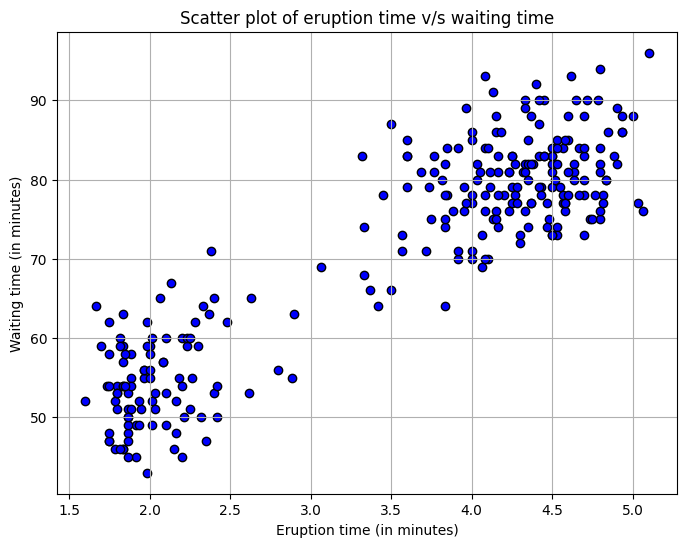

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('C:\\Users\\saita\\Downloads\\kali\\faithful.csv')
plt.figure(figsize=(8,6))
plt.scatter(data['eruptions'], data['waiting'], c='blue', edgecolor='k')
plt.xlabel('Eruption time (in minutes)')
plt.ylabel('Waiting time (in minutes)')
plt.title('Scatter plot of eruption time v/s waiting time')
plt.grid(True)
plt.show()

# PROBLEM 1 B) 
Based on the scatter plot, it is clear that there are two distinct clusters visible — one positioned towards the bottom left and the other towards the upper right of the graph.
We can observe that many data points seem to group closely together, almost as if they are surrounding invisible centers. This visual pattern suggests strong natural groupings, as the points within each cluster are very near to each other, indicating high internal similarity.

The first cluster, located towards the bottom left, includes data points where the eruption time is approximately between 1.5 to 2.5 minutes, and the corresponding waiting times range around 45 to 60 minutes.

The second cluster, situated towards the upper right side, consists of points where the eruption times are typically between 3.5 to 5 minutes, with waiting times falling in the range of 70 to 90 minutes.

This clear separation between the two groups supports the idea that using a clustering algorithm like K-Means with k=2 would be very appropriate for this dataset.

#problem 1 c)

 The process of hierarchical clustering typically follows these steps:

Step 1: Start by treating each individual data point as its own separate cluster.

Step 2: Calculate the pairwise distances (for example, using Euclidean distance) between all clusters.

Step 3: Identify and merge the two clusters that are closest together based on the chosen distance metric.

Step 4: After merging, recalculate the distances between the newly formed cluster and all the remaining clusters.

Step 5: Repeat steps 3 and 4 until all data points have been merged into a single large cluster, forming a hierarchical structure known as a dendrogram.

Step 6: To create a specific number of clusters, the dendrogram can be cut at a certain height, splitting the data into distinct groups.

Is Hierarchical Clustering Appropriate for This Dataset?
Yes, hierarchical clustering would be very appropriate for this dataset based on the scatter plot and the overall distribution of the points.

The two clusters observed are well-separated and clearly distinguishable, which aligns perfectly with the strengths of hierarchical clustering — especially the agglomerative (bottom-up) approach.
Hierarchical clustering would effectively capture these natural groupings without the need to specify the number of clusters in advance. Additionally, it would produce a dendrogram, providing a useful visual representation of how the data points are grouped together.

However, it is important to note that because the dataset is relatively small and shows only two prominent clusters, a simpler and more efficient method like K-Means clustering might be more practical for this particular case.


# Problem 2 A)

In [5]:
import numpy as np
import pandas as pd

# Prepare data (ignore any ID column if exists)
data=pd.read_csv('C:\\Users\\saita\\Downloads\\kali\\faithful.csv')
X = data[['eruptions', 'waiting']].values

# Define KMeans from scratch
class KMeansScratch:
    def __init__(self, k=2, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia_ = []

    def fit(self, X):
        # Randomly initialize centroids
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.k]
        self.centroids = X[random_idx]
        
        for _ in range(self.max_iters):
            # Assign labels based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Calculate inertia (sum of squared distances)
            inertia = np.sum((X - self.centroids[self.labels])**2)
            self.inertia_.append(inertia)

            # Calculate new centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])
            
            # If centroids do not change, break early
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Run the KMeans
kmeans = KMeansScratch(k=2)
kmeans.fit(X)

print("Final Centroids:\n", kmeans.centroids)
print("Number of Iterations:", len(kmeans.inertia_))

Final Centroids:
 [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]
Number of Iterations: 4


# Problem 2B) Scatter plot of the clustering

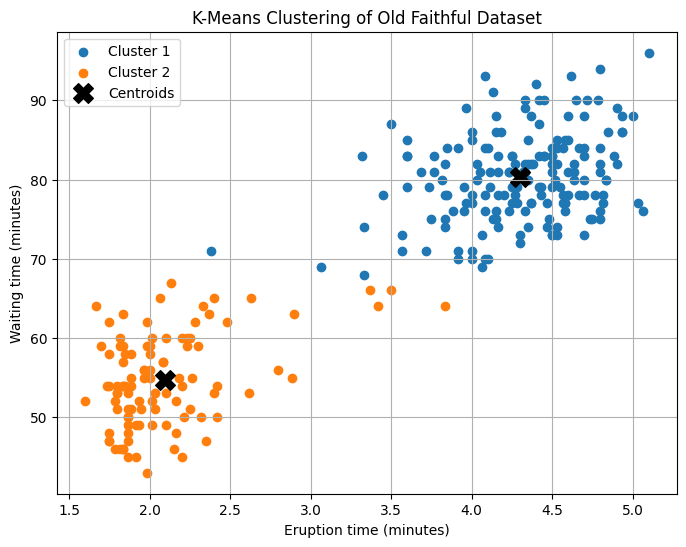

In [8]:
# Scatter plot of final clusters with centroids
plt.figure(figsize=(8,6))
for cluster in range(kmeans.k):
    plt.scatter(X[kmeans.labels == cluster, 0], X[kmeans.labels == cluster, 1], label=f'Cluster {cluster+1}')

# Plot centroids
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.title('K-Means Clustering of Old Faithful Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2C) Plot of objective function vs iterations

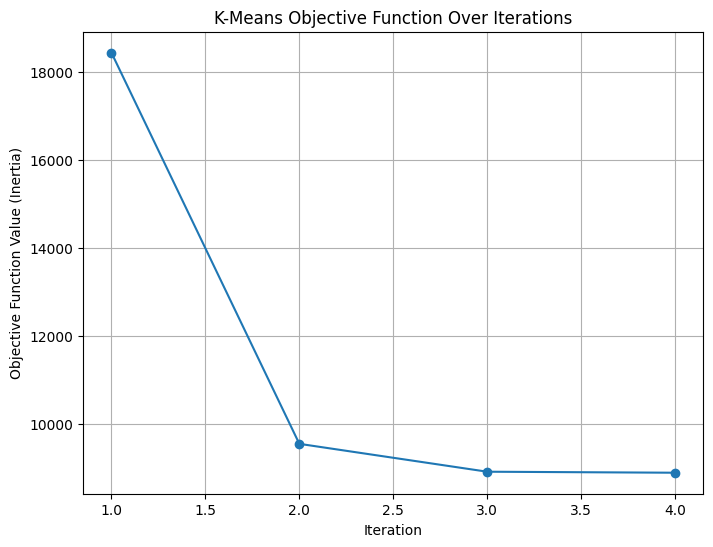

In [9]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(kmeans.inertia_)+1), kmeans.inertia_, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Inertia)')
plt.title('K-Means Objective Function Over Iterations')
plt.grid(True)
plt.show()

# Problem 2 D) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)

Yes, I believe the K-Means algorithm successfully identified the two clusters that we observed in Problem 1.
From our initial analysis, we understood that the data naturally forms two main groups — and K-Means was able to capture this separation effectively.
The algorithm clearly distinguished between:

Shorter eruptions that are followed by shorter waiting times, and

Longer eruptions that are followed by longer waiting times.

Overall, the clustering results align well with our expectations based on the scatter plot, confirming that K-Means worked well for this dataset.